In [64]:
warnings.simplefilter('ignore')

어떤 동물의 어미의 몸무게가 xkg일 때 새끼의 몸무게는 x를 기댓값으로 하고 5kg 표준편차를 가지는 정규분포라고 가정하자. 이 동물의 새끼 중 2마리의 몸무게를 각각 A, B라고 하고 어미의 몸무게를 C라고 한다. 시물레이션을 통해 어미 표본과 각각의 어미에 대해 2마리의 새끼 표본을 만들자.

In [1]:
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

# NB의 가정

- 같은 클래스 내에서 독립변수는 조건부 독립이다.

- 무조건부 상관관계와 조건부 상관관계는 서로 관련이 없다.

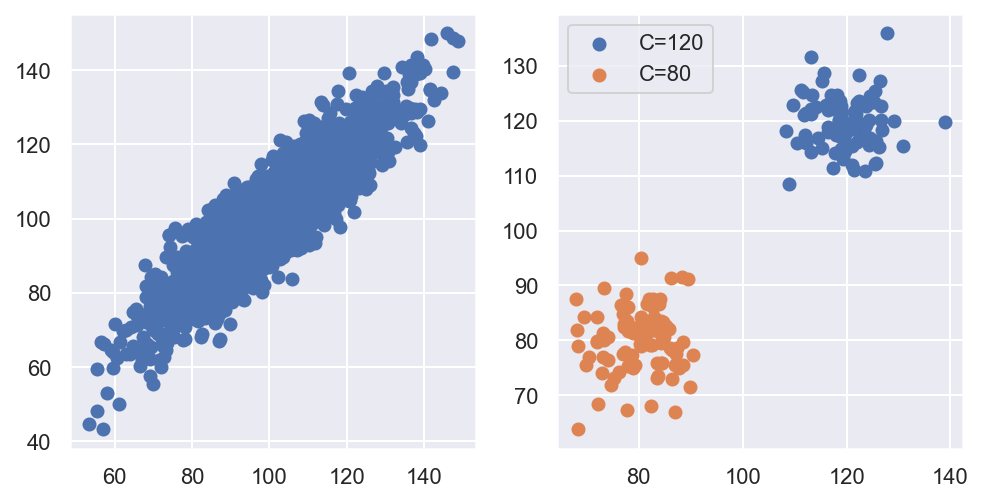

In [5]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(A, B)

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label='C=120')
plt.scatter(A[idx2], B[idx2], label='C=80')
plt.legend()
plt.show()

# 나이브 베이지안 분류모형

- GaussianNB: 정규분포 나이브베이즈
    - x가 실수

- BernoulliNB: 베르누이분포 나이브베이즈
    - x가 0, 1

- MultinomialNB: 다항분포 나이브베이즈
    - x가 정수

- classes_

    - 종속변수 Y의 클래스(라벨)

- class_count_

    - 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수

- class_prior_

    - 종속변수 Y의 무조건부 확률분포 P(Y) (정규분포의 경우에만)

- class_log_prior_

    - 종속변수 Y의 무조건부 확률분포의 로그 logP(Y) (베르누이분포나 다항분포의 경우에만)



##  정규분포 나이브베이즈 모형

- theta_: 정규분포의 기댓값 μ

- sigma_: 정규분포의 분산 σ2
    - 비대각 성분이 모두 0이므로, 대각성분만 취급해서 벡터로 나옴

### 예시

실수인 두 개의 독립변수 x1,x2와 두 종류의 클래스 y=0,1을 가지는 분류문제가 있다.

두 독립변수의 분포는 정규분포이고 y의 클래스에 따라 다음처럼 모수가 달라진다.

\begin{split} 
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix} 
\end{split}

\begin{split} 
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix} 
\end{split}

데이터는 y=0인 데이터가 40개, y=1인 데이터가 60개 주어졌다. 이 데이터를 시각화하면 다음과 같다.

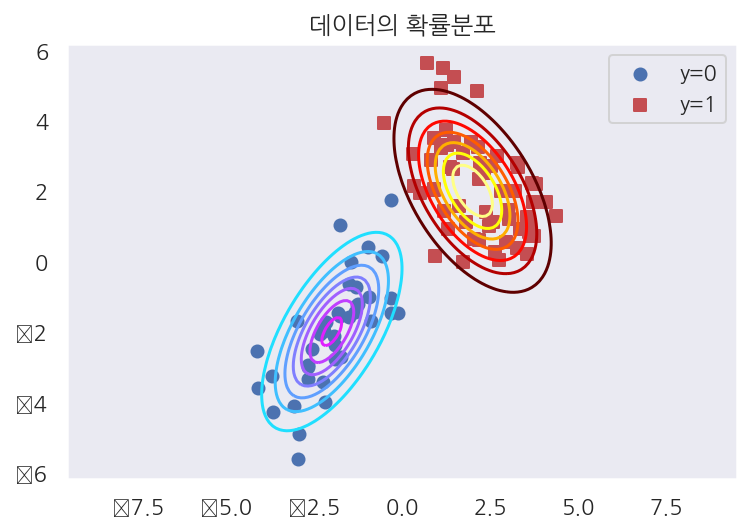

In [34]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [36]:
X.shape

(100, 2)

In [37]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X,y)

In [38]:
# 클래스 라벨
model_norm.classes_

array([0., 1.])

In [39]:
# 클래스별 개수
model_norm.class_count_

array([40., 60.])

In [40]:
# 클래스별 사전확률
model_norm.class_prior_

array([0.4, 0.6])

In [41]:
# y = 0 일 때의, x1, x2의 평균 / 분산
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [42]:
# y = 1 일 때의, x1, x2의 평균 / 분산
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

- 이제 모델링된 데이터의 확률분포를 보자

C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


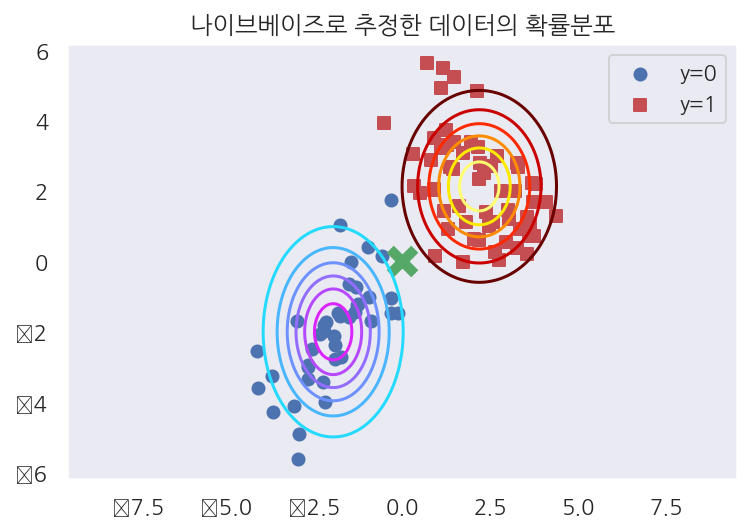

In [43]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

- 이 모형을 사용하여 xnew=(0,0)인 데이터의 y값을 예측하자. 각 클래스값이 나올 확률은 predict_proba 메서드로 구할 수 있다.

In [45]:
model_norm.predict_proba([[0,0]])

array([[0.48475244, 0.51524756]])

In [46]:
model_norm.predict([[0,0]])

array([1.])

### 연습문제

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

model = GaussianNB().fit(X,y)
y_pred = model.predict(X)

- 각각의 종이 선택될 사후확률

In [49]:
model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

- 각 종에 대해 각 feature의 평균과 분산을 구하라

In [53]:
# setosa
model.theta_[0], model.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [54]:
# versicolor
model.theta_[1], model.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [55]:
# virginica
model.theta_[2], model.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

- 학습용 데이터를 사용하여 분류문제를 풀고 다음을 계산하라
    - 분류결과표
    - 분류보고서
    - ROC 커브
    - AUC

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [78]:
print(classification_report(y, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



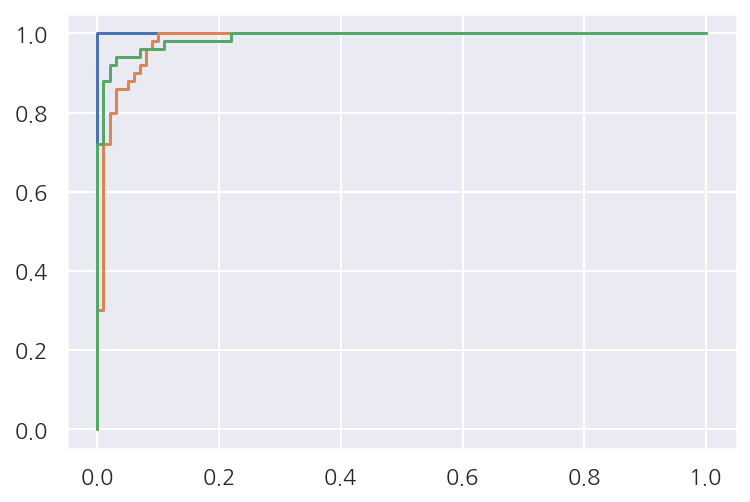

In [77]:
from sklearn.preprocessing import label_binarize
y_lb = label_binarize(y, [0,1,2])
for i in range(3):
    model =  GaussianNB().fit(X, y_lb[:,i])
    fpr, tpr, _ = roc_curve(y_lb[:, i], model.predict_proba(X)[:,1])
    plt.plot(fpr, tpr)
plt.show()

## 베르누이 모형

- 스팸
    - 메일은 10개 (row=10)
    - 키워드 4개 (columns=4)

In [79]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    # 위 : 클래스 0
    # 아래 : 클래스 1
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [81]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X,y)

In [83]:
model.classes_

array([0, 1])

In [84]:
model.class_count_

array([4., 6.])

In [92]:
# 사전확률
np.exp(model.class_log_prior_)

array([0.4, 0.6])

In [96]:
# 클래스별로(row), 각 동전(feature)의 동전 앞면 몇번 나왔나
fc = model.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [107]:
a = fc[0] / np.unique(y, return_counts= True)[1][0]
b = fc[1] / np.unique(y, return_counts= True)[1][1]
prob = np.vstack([a,b])
prob

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [95]:
# 라플라스 스무딩 한 번 해준 놈
model.alpha

1.0

- 스무딩 적용된 베르누이 모수값은 다음과 같다.

In [109]:
theta = np.exp(model.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

- 새로운 메일 

In [112]:
x_new = np.array([1,1,0,0])
model.predict([x_new])

array([0])

In [113]:
model.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

In [115]:
x_new2 = np.array([0,1,1,1])
print('x_new2의 클래스는',model.predict([x_new2]))
print('판단 근거는', model.predict_proba([x_new2]))

x_new2의 클래스는 [1]
판단 근거는 [[0.34501348 0.65498652]]


### 연습문제

In [138]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
# 이미지 갯수 : 1797
X.shape

(1797, 64)

In [139]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [118]:
# 이미지를 1차원으로 flatten한 것.
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [121]:
digits.images.shape

(1797, 8, 8)

In [119]:
digits.images[0, :, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

- 0과 1로 되어있지 않읜, 고쳐야 함.

In [124]:
from sklearn.preprocessing import  Binarizer
# 7보다 크면 1, 작거나 같으면 0
X2 = Binarizer(7).fit_transform(X)

In [125]:
X2[0,:]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

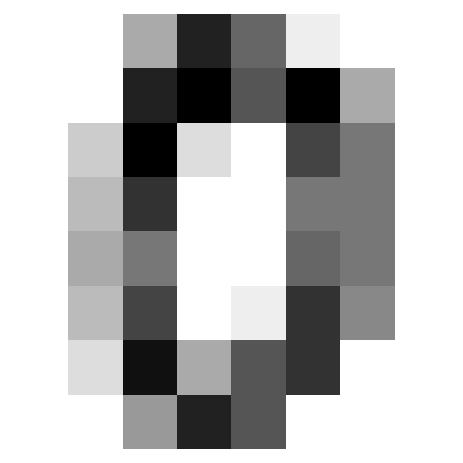

In [134]:
# 원래 첫번째 이미지
plt.imshow(digits.images[0,:,:], cmap=plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()

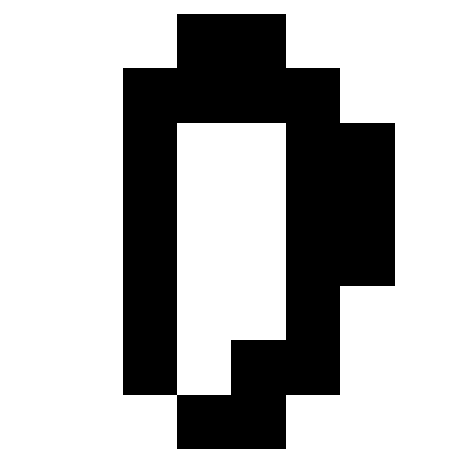

In [135]:
# binarize한 후의 이미지
plt.imshow(X2[0,:].reshape((8,8)), cmap=plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()

- 전처리 후의 이미지에 대해 배르누이 나이브베이즈 모형을 적용하여 분류 결과를 분류보고서 형식으로 출력

In [141]:
X2.shape, len(y)

((1797, 64), 1797)

In [143]:
model = BernoulliNB().fit(X2,y)
y_pred=  model.predict(X2)

In [146]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



- 사실 BernoulliNB 클래스에 binarize 인수가 있음. 시발

In [150]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X.shape, np.unique(X)

((1797, 64),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]))

In [153]:
model = BernoulliNB(binarize=7).fit(X,y)
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



- 계산된 모형의 모수 벡터 값을 각 클래스별로 8x8 이미지의 형태로 나타내라. 이 이미지는 무엇을 뜻하는가?

In [156]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
X = Binarizer(7).fit_transform(X)
y = digits.target

model = BernoulliNB().fit(X, y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [160]:
# y 클래스 / 클래스 별 개수 / 클래스 별 사전 확률
model.classes_, model.class_count_, np.exp(model.class_log_prior_)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0.09905398, 0.10127991, 0.0984975 , 0.10183639, 0.10072343,
        0.10127991, 0.10072343, 0.09961046, 0.09682805, 0.10016694]))

In [163]:
# 각 로우(클래스)마다, 64개의 독립변수 별로 1이 나온 횟수가 저장되어 있음.
model.feature_count_.shape

(10, 64)

In [174]:
# smoothing 해준 놈.
# 클래스별, 그리고 독립변수 별, 확률
theta = np.exp(model.feature_log_prob_)
theta.shape

(10, 64)

In [175]:
theta[0, :]

array([0.00555556, 0.00555556, 0.15      , 0.97777778, 0.86111111,
       0.11666667, 0.00555556, 0.00555556, 0.00555556, 0.01666667,
       0.90555556, 0.93333333, 0.82222222, 0.83888889, 0.02777778,
       0.00555556, 0.00555556, 0.1       , 0.97222222, 0.32777778,
       0.08888889, 0.92222222, 0.11111111, 0.00555556, 0.00555556,
       0.23333333, 0.93333333, 0.09444444, 0.00555556, 0.67222222,
       0.43888889, 0.00555556, 0.00555556, 0.31111111, 0.91111111,
       0.03333333, 0.00555556, 0.61666667, 0.61666667, 0.00555556,
       0.00555556, 0.05555556, 0.97222222, 0.07777778, 0.06111111,
       0.84444444, 0.36111111, 0.00555556, 0.00555556, 0.00555556,
       0.94444444, 0.71666667, 0.72777778, 0.92222222, 0.09444444,
       0.00555556, 0.00555556, 0.00555556, 0.13333333, 0.98888889,
       0.94444444, 0.3       , 0.00555556, 0.00555556])

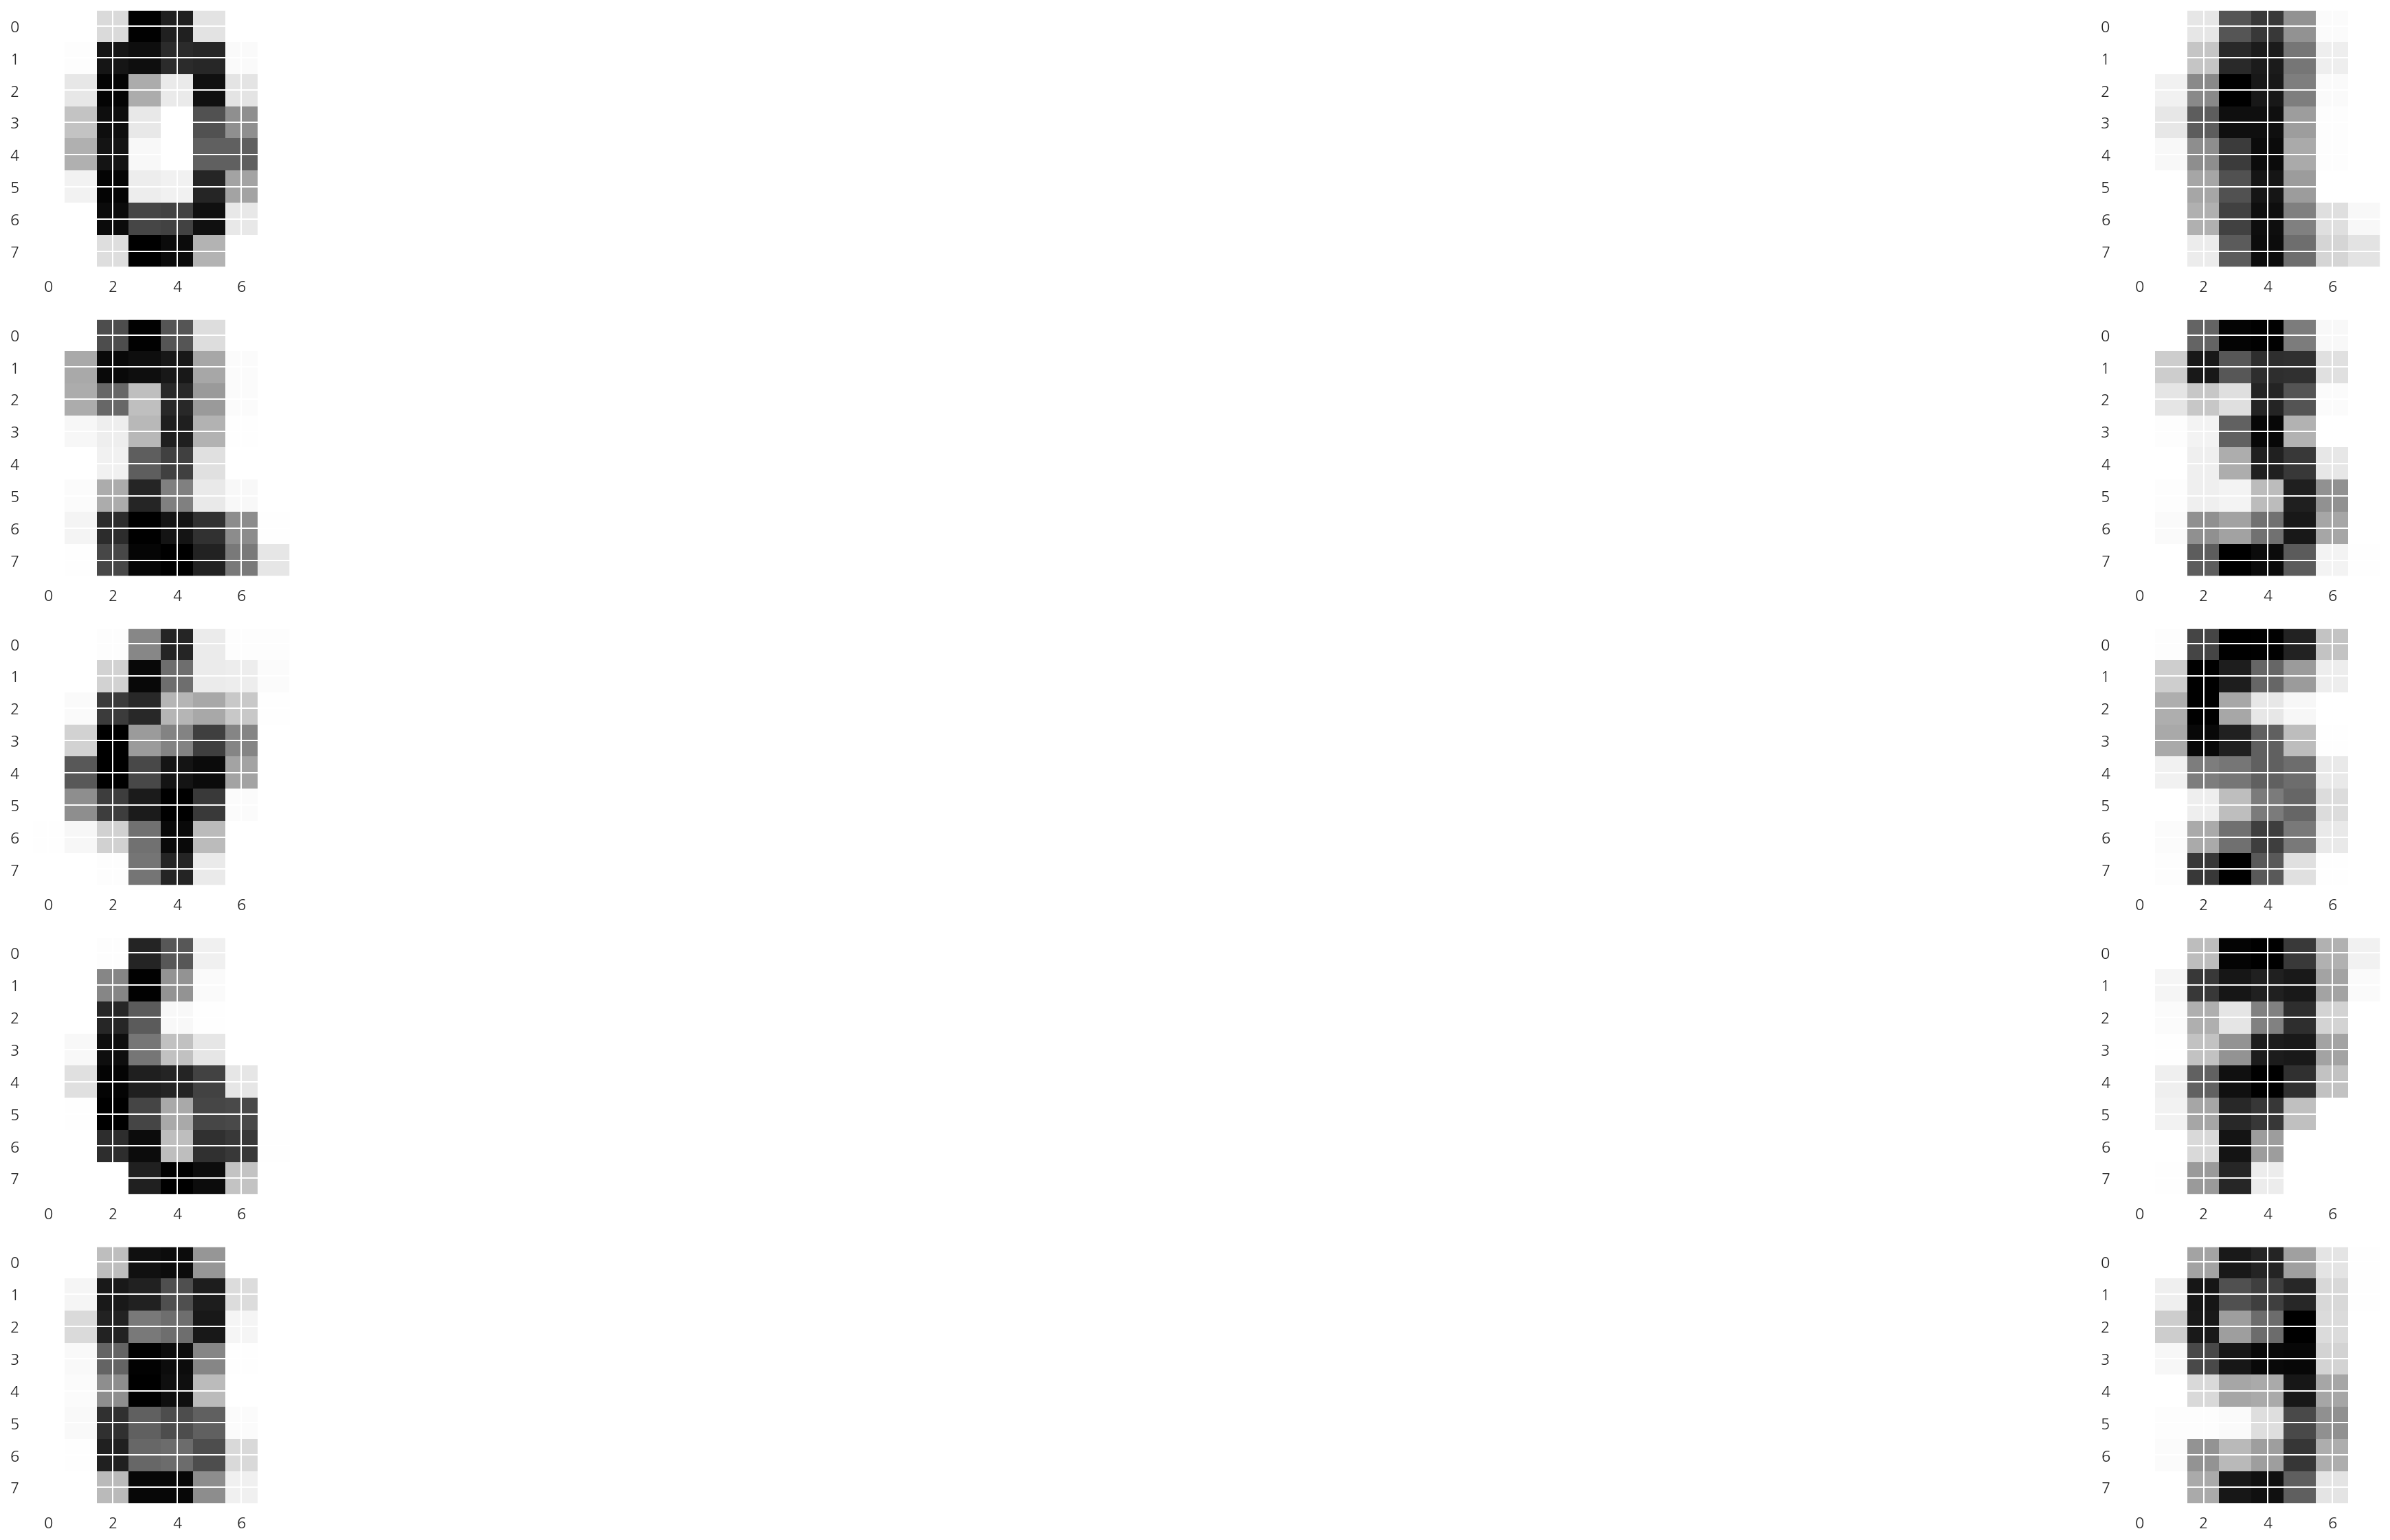

In [178]:
figure = plt.figure(figsize=(50,20))
axes = [figure.add_subplot(5,2,i) for i in range(1, 11)]
for i in range(10):
    axes[i].imshow(theta[i].reshape((8,8)), cmap=plt.cm.binary)

## 다항분포 나이브베이즈 모형

In [179]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [180]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X, y)

In [187]:
model.classes_, model.class_count_, np.exp(model.class_log_prior_)

(array([0, 1]), array([4., 6.]), array([0.4, 0.6]))

In [189]:
# 각 클래스 내 (row로 구분), 독립변수 별(column 구분) count
model.feature_count_

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [194]:
# 각 클래스 내 (row로 구분), 독립변수 별 확률
theta = np.exp(model.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [196]:
x_new = np.array([10,10,10,10])
print(model.predict([x_new]))
model.predict_proba([x_new])

[1]


array([[0.38848858, 0.61151142]])

### 연습문제

- MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.

In [197]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X,y)
y_pred = model.predict(X)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



- 텍스트 분석에서는 현실적으로 쓸 수 있는게 나이브 베이즈밖에 없음... 계산량 커버 가능한게 이거밖에 없음.

# 예) 뉴스그룹 분류

In [14]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])

model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()) ])

model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('model', MultinomialNB()),
])

model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english',
                           token_pattern =r'\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b')),
    ('model', MultinomialNB()),
])

In [16]:
from sklearn.model_selection import cross_val_score, KFold
for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print("Model{0:d}: Mean score: {1:.3f}".format(i + 1, np.mean(scores)))

Model1: Mean score: 0.855
Model2: Mean score: 0.856
Model3: Mean score: 0.883
Model4: Mean score: 0.888


# 예) 가우시안과 베르누이 섞어 써야 한다면...?

In [22]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
X = covtype.data
y = covtype.target
X1 = X[:,:10]
X2 = X[:,10:]
X1[0], X2[0]

(array([2.596e+03, 5.100e+01, 3.000e+00, 2.580e+02, 0.000e+00, 5.100e+02,
        2.210e+02, 2.320e+02, 1.480e+02, 6.279e+03]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [29]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7])

In [34]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
model1 = GaussianNB().fit(X1, y)
model2 = BernoulliNB().fit(X2, y)

In [35]:
prob1 = model1.predict_proba(X1)   # 사후확률
prob2 = model2.predict_proba(X2)   # 사후확률

In [36]:
# 1개의 row 의미 : 1줄(하나의 객체)을 받았을 때, (여기서는 feature 10개) 이거를 y의 클래스 개수만큼, 각각의 확률 구한 것.
prob1.shape

(581012, 7)

In [37]:
prob1[0].sum()  # 거의 1에 가까운 값.

0.9999999999999972

In [ ]:
likeli1 = prob1 / model1.class_prior_
likeli2 = prob2 / np.exp(model2.class_log_prior_)

In [41]:
# 둘은 사실 같은 값. 왜? 사전확률은 x를 고려하지 않기 떄문
model1.class_prior_ - np.exp(model2.class_log_prior_)

array([-2.22044605e-16, -3.33066907e-16, -4.85722573e-17, -2.60208521e-18,
       -1.04083409e-17, -6.93889390e-18, -5.55111512e-17])

In [42]:
likeli1 = prob1 / model1.class_prior_
likeli2 = prob2 / model1.class_prior_

In [44]:
prob = likeli1 * likeli2 * model1.class_prior_

In [48]:
# 예측값.
y_pred = np.argmax(prob, axis=1)+1

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred).sum() - np.trace(confusion_matrix(y, y_pred))

200821

In [55]:
confusion_matrix(y, y_pred)

array([[140348,  53648,    157,      0,   2071,    881,  14735],
       [ 65031, 188638,   5849,     19,  12541,   7752,   3471],
       [     0,   2307,  23675,   3094,   1319,   5359,      0],
       [     0,      0,    551,   1941,      0,    255,      0],
       [   245,   5134,    275,      0,   3513,    326,      0],
       [     0,   1910,   6230,    621,    464,   8142,      0],
       [  6371,    183,      0,      0,     22,      0,  13934]],
      dtype=int64)